<a href="https://colab.research.google.com/github/Dario-Maglio/Numerical_Methods/blob/main/Application_projects/Ising_model_2D/interface_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Colab interface for the Ising 2D simulation



#Get started

Import python packages

In [1]:
import os 

import numpy as np 
import matplotlib.pyplot as plt

import multiprocessing as mp

Clone the repository and change the current directory

In [ ]:
!git clone https://github.com/Dario-Maglio/Numerical_methods.git
%cd Numerical_methods/Application_projects/Ising_model_2D/

Body of the work
================

Execute programs

In [ ]:
!g++ ising_lattice.h ising_main.cpp -o main.out
!./main.out

Analysis of the output file for eache side in a row, to get control on the error

In [ ]:
!g++ data_analysis.cpp -o data.out
!./data.out

In the end
==========

Make plots of energy and magnetization (uno accanto all'altro)

Loading directory Side_20
Loading directory Side_30
Loading directory Side_40
Loading directory Side_50
Loading directory Side_60

 Plots of energy and magnetization: 



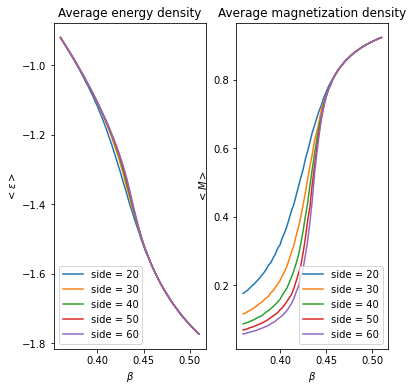

In [3]:
fig, axes = plt.subplots(1, 2, num="energy and magnetization", figsize=(6, 6))

axes[0].set_title("Average energy density")
axes[0].set_ylabel(r'$< \epsilon >$')
axes[0].set_xlabel(r'$\beta$')

axes[1].set_title("Average magnetization density")
axes[1].set_ylabel(r'$< M >$')
axes[1].set_xlabel(r'$\beta$')
    
sides = np.arange(20, 61, 10, dtype='int')
betas = np.arange(0.3600, 0.5101, 0.0025, dtype='float')

for side in sides:
    ene = []
    mag = []

    directory = f"Side_{side}"
    print("Loading directory " + directory)

    for beta in betas:
        filename = "side_{0}_beta_{1:.6f}.dat".format(side, beta)
        file = os.path.join(directory, filename)

        if os.path.isfile(file):
            x, y = np.loadtxt(file, unpack='True')
            ene.append(np.mean(x))
            mag.append(np.mean(abs(y)))

    axes[0].plot(betas, ene, label=f'side = {side}')

    axes[1].plot(betas, mag, label=f'side = {side}')

print("\n Plots of energy and magnetization: \n")
axes[0].legend(loc='lower left')
axes[1].legend(loc='lower right')
plt.show()

Make plot of specific heat and susceptibility (affiancati)

Loading Data_analysis/side_20_data.dat
Loading Data_analysis/side_30_data.dat

Plots: 



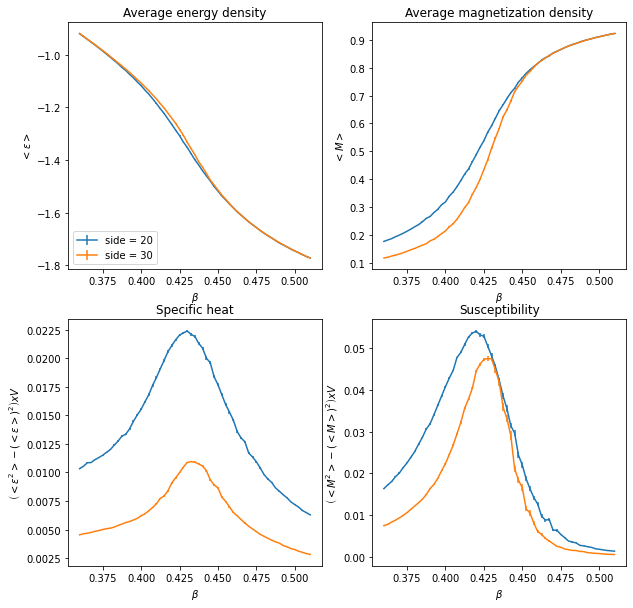

In [11]:
fig, axes = plt.subplots(2, 2, num="specific heat and susceptibility", figsize=(10, 10))

axes[0, 0].set_title("Average energy density")
axes[0, 0].set_ylabel(r'$< \epsilon >$')
axes[0, 0].set_xlabel(r'$\beta$')

axes[0, 1].set_title("Average magnetization density")
axes[0, 1].set_ylabel(r'$< M >$')
axes[0, 1].set_xlabel(r'$\beta$')

axes[1, 0].set_title("Specific heat")
axes[1, 0].set_ylabel(r'$ \left( < \epsilon^2 > - \left( < \epsilon > \right)^2 \right) x V $')
axes[1, 0].set_xlabel(r'$\beta$')

axes[1, 1].set_title("Susceptibility")
axes[1, 1].set_ylabel(r'$ \left( < M^2 > - \left( < M > \right)^2 \right) x V $')   
axes[1, 1].set_xlabel(r'$\beta$')

sides = np.arange(20, 31, 10, dtype='int')

directory = "Data_analysis"


for side in sides:
    filename = f"side_{side}_data.dat" 
    file_path = os.path.join(directory, filename)
    print("Loading " + file_path)

    if os.path.isfile(file_path):
        betas, enes, enes_err, mags, mags_err, heat, heat_err, chi, chi_err, cum = np.loadtxt(file_path, unpack='True')

    axes[0, 0].errorbar(betas, enes, yerr=enes_err, label=f'side = {side}')

    axes[0, 1].errorbar(betas, mags, yerr=mags_err, label=f'side = {side}')

    axes[1, 0].errorbar(betas, heat, yerr=heat_err, label=f'side = {side}')

    axes[1, 1].errorbar(betas, chi, yerr=chi_err, label=f'side = {side}')


print("\nPlots: \n")
axes[0, 0].legend(loc='lower left')
plt.show()
    

In [ ]:
!ls 

At last, remove things you don't need anymore and move to the main directory

In [ ]:
%cd ..

#Push to GitHub

In [ ]:
!git pull          # update your local version of the repository

Already up to date.


In [ ]:
!git status        # check the changes you made to your local version of the repository

In [ ]:
!git add .         # add the changes that you want to save, to the commit list 

In [ ]:
# Anna
!git config user.email "nanacaliendo@gmail.com"
!git config user.name  "Melanna7"

# Dario
#!git config user.email "cafasso.dario@gmail.com"
#!git config user.name  "Dario_Maglio"

In [ ]:
!git commit -m "implemented bootstrap and blocking algorithm in ising 2D"    # save changes in your local version of the repository

In [ ]:
# Generate the <TOKEN> in Profile/Setting/Developer_setting/Personal_access_token
!git push https://Dario-Maglio:<TOKEN>@github.com/Dario-Maglio/Numerical_Methods.git  # save changes on GitHub